# Import Section

In [ ]:
import vertexai
from PIL import Image as P_Img
from google.cloud import aiplatform
from google.colab import userdata
from google.oauth2 import service_account
from IPython.display import display
from vertexai.preview.vision_models import Image, ImageGenerationModel

# Input Image

In [ ]:
input_file = "iphone_image.jpg"

In [ ]:
im = P_Img.open(input_file)

In [ ]:
display(im)

# Vertex AI Credentials

In [ ]:
credentials = service_account.Credentials.from_service_account_file('key.json')

In [ ]:
project_id = userdata.get('GCP_PROJECT_ID')

vertexai.init(project=project_id,
              location="us-west1",
              credentials=credentials)

# Output

In [ ]:
output_file = "output_image.png"

In [24]:
prompt = "Keeping the phone at the center, change the background to Bruj Khalifa"

In [25]:
model = ImageGenerationModel.from_pretrained("imagegeneration@006")
base_img = Image.load_from_file(location=input_file)

In [26]:
images = model.edit_image(
    base_image=base_img,
    prompt=prompt,
    edit_mode="product-image",
)

# print(len(images))

images[0].save(location = output_file, include_generation_parameters=False)

print(f"Created output image using {len(images[0]._image_bytes)} bytes")

Created output image using 1169768 bytes


In [27]:
out_img = P_Img.open(output_file)

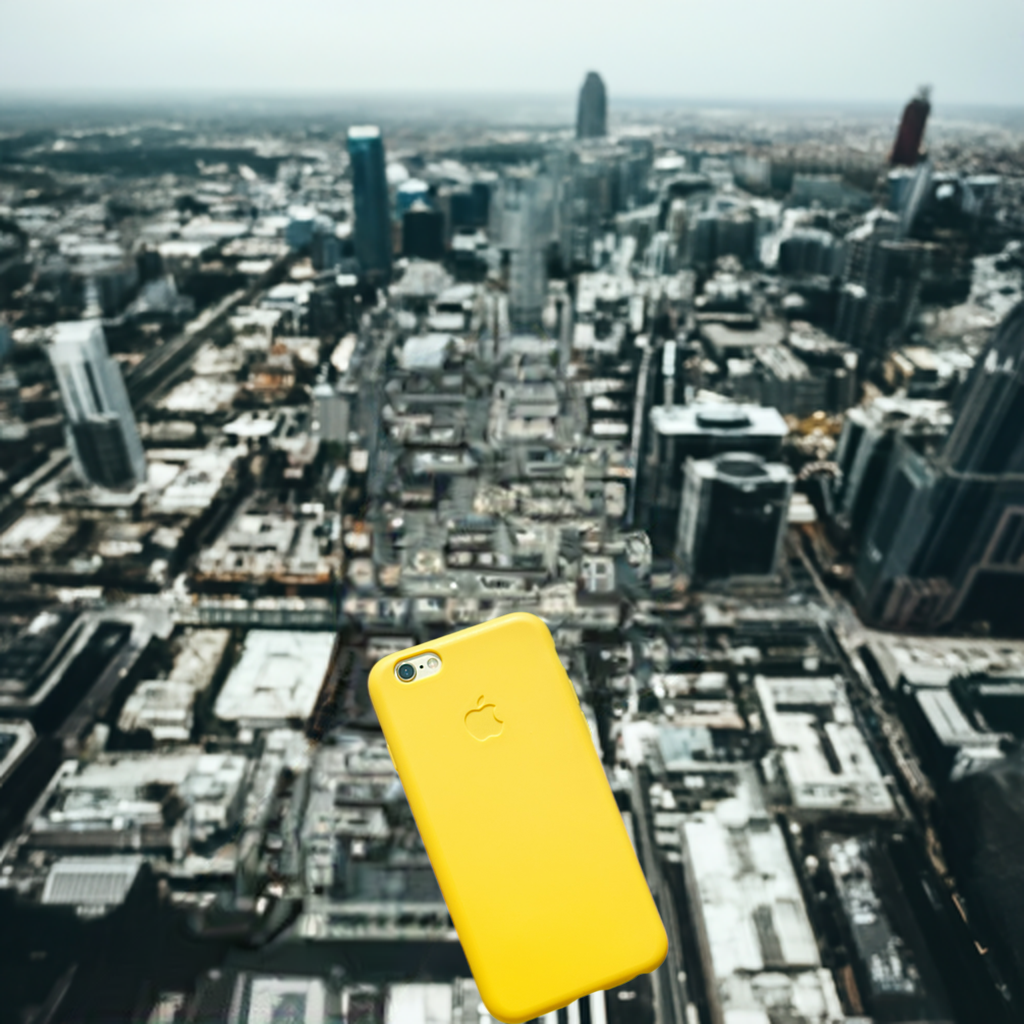

In [28]:
display(out_img)